In [1]:
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('/home/stacyste/Documents/Research/OverloadedSignaling/Algorithms/ImaginedWe')
sys.path.append('/home/stacyste/Documents/Research/OverloadedSignaling/Environments/Grosse')

In [2]:
from consistentSignalChecks_Grosse import signalIsConsistent_Grosse
from grosseConstruction import *

from mindConstruction import *
from GenerativeSignaler import SignalerZero
from OverloadedReceiver import ReceiverZero
from OverloadedSignaler import SignalerOne

# Examples

## Hands Free Condition

Here the goal space is restricted to L or R, could also be n or LR (both)

In [4]:
#utility
costD = [{'L':-3, 'R':-1, 'n':0},{'L':-2, 'R':-2, 'n':0}]
rewardValue = 10
getUtility = ActionUtility_Grosse(costD, rewardValue)

#p(a|w,g) function
a = .4
getActionPDF = ActionDistributionGivenWorldGoal_Grosse(alpha = a, actionUtilityFunction=getUtility, softmax=True)
getGoalPDF = GoalDistribution_NonUniform({'L':.23, 'R':.77})

#p(mind) function
getMind = GenerateMind(getWorldProbabiltiy_Uniform, getDesireProbability_Uniform, getGoalPDF, getActionPDF)


#condition parameters
handsFreeCondition = {'worlds': ['LR'], 'desires': [1], 'intentions': ['L', 'R'], 'actions': [('n', 'n'), ('L', 'n'), ('R', 'n'), ('n', 'L'), ('n', 'R'), ('L', 'R'), ('R', 'L')]}
signalCategoryPrior = {'1':1}
signalSpace = ['help', 'null']

#inference
getGenerativeSignaler = SignalerZero(signalSpace, signalIsConsistent_Grosse)
getReceiverZero = ReceiverZero(commonGroundDictionary=handsFreeCondition, constructMind=getMind, getSignalerZero=getGenerativeSignaler, signalCategoryPrior=signalCategoryPrior)
getSignalerOne = SignalerOne(a, signalSpace, getUtility, getReceiverZero)

In [5]:
getActionPDF([('n', 'n'), ('L', 'n'), ('R', 'n'), ('n', 'L'), ('n', 'R'), ('L', 'R'), ('R', 'L')], 'LR', 'L')

,"p(a|w,i)"
actions,
"(n, n)",0.014941
"(L, n)",0.245697
"(R, n)",0.010015
"(n, L)",0.366537
"(n, R)",0.006713
"(L, R)",0.110399
"(R, L)",0.245697


In [6]:
getGoalPDF(['L', 'R'], 'LR', 'L')

,"p(i|w,d)"
intentions,
L,0.23
R,0.77


In [6]:
# Mind prior
round(getMind(handsFreeCondition), 3)

p(mind)
worlds desires intentions actions         
LR     1       L          (L, R)     0.025
                          (L, n)     0.057
                          (R, L)     0.057
                          (R, n)     0.002
                          (n, L)     0.084
                          (n, R)     0.002
                          (n, n)     0.003
               R          (L, R)     0.066
                          (L, n)     0.003
                          (R, L)     0.146
                          (R, n)     0.325
                          (n, L)     0.004
                          (n, R)     0.218
                          (n, n)     0.009

In [7]:
getReceiverZero('null')

p(mind|signal)
worlds desires intentions actions                
LR     1       L          (L, R)         0.000000
                          (L, n)         0.141707
                          (R, L)         0.000000
                          (R, n)         0.005776
                          (n, L)         0.000000
                          (n, R)         0.000000
                          (n, n)         0.008617
               R          (L, R)         0.000000
                          (L, n)         0.006707
                          (R, L)         0.000000
                          (R, n)         0.814927
                          (n, L)         0.000000
                          (n, R)         0.000000
                          (n, n)         0.022267

In [8]:
round(getReceiverZero('help'), 3)

p(mind|signal)
worlds desires intentions actions                
LR     1       L          (L, R)            0.042
                          (L, n)            0.000
                          (R, L)            0.094
                          (R, n)            0.000
                          (n, L)            0.140
                          (n, R)            0.003
                          (n, n)            0.000
               R          (L, R)            0.109
                          (L, n)            0.000
                          (R, L)            0.243
                          (R, n)            0.000
                          (n, L)            0.007
                          (n, R)            0.362
                          (n, n)            0.000

In [9]:
getSignalerOne({'worlds':'LR', 'intentions':'L'})

,probabilities
signals,
help,0.791951
null,0.208049


In [10]:
getSignalerOne({'worlds':'LR', 'intentions':'R'})

,probabilities
signals,
help,0.382192
null,0.617808


### Plotting for action and goal posterior of null signal and help signal

#### Null Signal

In [11]:
actionPosterior = pd.DataFrame(getReceiverZero('null').groupby(level=['actions']).sum())
actionPosterior

,p(mind|signal)
actions,
"(L, R)",0.000000
"(L, n)",0.148413
"(R, L)",0.000000
"(R, n)",0.820703
"(n, L)",0.000000
"(n, R)",0.000000
"(n, n)",0.030884


In [12]:
goalPosterior = getReceiverZero('null').groupby(level=['intentions']).sum()
goalPosterior

,p(mind|signal)
intentions,
L,0.1561
R,0.8439


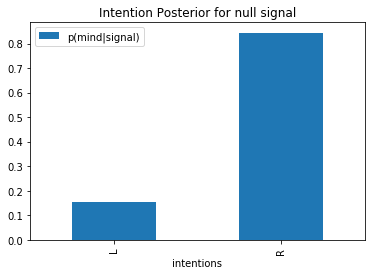

In [13]:
goalPosterior.plot.bar(title = 'Intention Posterior for null signal')
plt.show()

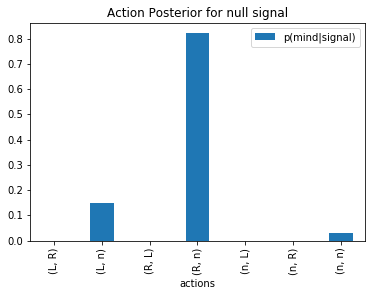

In [14]:
actionPosterior.plot.bar(title = 'Action Posterior for null signal')
plt.show()

In [15]:
#### Help Signal

In [16]:
actionPosteriorHelp = pd.DataFrame(getReceiverZero('help').groupby(level=['actions']).sum())
actionPosteriorHelp

,p(mind|signal)
actions,
"(L, R)",0.151367
"(L, n)",0.000000
"(R, L)",0.336873
"(R, n)",0.000000
"(n, L)",0.146858
"(n, R)",0.364902
"(n, n)",0.000000


In [17]:
goalPosteriorHelp = getReceiverZero('help').groupby(level=['intentions']).sum()
goalPosteriorHelp

,p(mind|signal)
intentions,
L,0.279018
R,0.720982


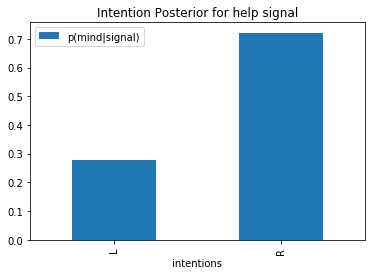

In [18]:
goalPosteriorHelp.plot.bar(title = 'Intention Posterior for help signal')
plt.show()

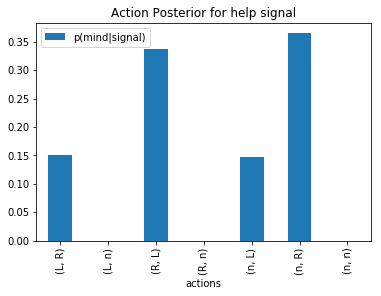

In [19]:
actionPosteriorHelp.plot.bar(title = 'Action Posterior for help signal')
plt.show()

In [20]:
dict_actionPosterior = actionPosteriorHelp.T.to_dict()
you_actionPosterior = {'R':0, 'L':0, 'n':0}
for key, value in dict_actionPosterior.items():
    you_actionPosterior[key[1]] = you_actionPosterior[key[1]] + value['p(mind|signal)']

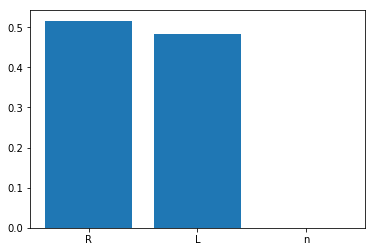

In [21]:
plt.bar(range(len(you_actionPosterior)), list(you_actionPosterior.values()), align='center')
plt.xticks(range(len(you_actionPosterior)), list(you_actionPosterior.keys()))
plt.show()

## Hands Occupied

In [22]:
#parameters consistent across conditions defined as a very high cost of action (alternatively, could simply restrict the action space)
costD = [{'L':-50, 'R':-50, 'n':0},{'L':-2, 'R':-2, 'n':0}]
rewardValue = 10
getUtility = ActionUtility_Grosse(costD, rewardValue)

a = .4
getActionPDF = ActionDistributionGivenWorldGoal_Grosse(alpha = a, actionUtilityFunction=getUtility, softmax=True)

getMind = GenerateMind(getWorldProbabiltiy_Uniform, getDesireProbability_Uniform, getGoalGivenWorldAndDesire_Grosse, getActionPDF)

handsFreeCondition = {'worlds': ['LR'], 'desires': [1], 'intentions': ['L', 'R'], 'actions': [('n', 'n'), ('L', 'n'), ('R', 'n'), ('n', 'L'), ('n', 'R'), ('L', 'R'), ('R', 'L')]}
signalCategoryPrior = {'1':1}
signalSpace = ['help', 'null']

getGenerativeSignaler = SignalerZero(signalSpace, signalIsConsistent_Grosse)
getReceiverZero = ReceiverZero(commonGroundDictionary=handsFreeCondition, constructMind=getMind, getSignalerZero=getGenerativeSignaler, signalCategoryPrior=signalCategoryPrior)
getSignalerOne = SignalerOne(a, signalSpace, getUtility, getReceiverZero)


In [23]:
round(getReceiverZero('help'),3)

p(mind|signal)
worlds desires intentions actions                
LR     1       L          (L, R)            0.000
                          (L, n)            0.000
                          (R, L)            0.000
                          (R, n)            0.000
                          (n, L)            0.491
                          (n, R)            0.009
                          (n, n)            0.000
               R          (L, R)            0.000
                          (L, n)            0.000
                          (R, L)            0.000
                          (R, n)            0.000
                          (n, L)            0.009
                          (n, R)            0.491
                          (n, n)            0.000

In [24]:
round(getReceiverZero('null'),3)

p(mind|signal)
worlds desires intentions actions                
LR     1       L          (L, R)              0.0
                          (L, n)              0.0
                          (R, L)              0.0
                          (R, n)              0.0
                          (n, L)              0.0
                          (n, R)              0.0
                          (n, n)              0.5
               R          (L, R)              0.0
                          (L, n)              0.0
                          (R, L)              0.0
                          (R, n)              0.0
                          (n, L)              0.0
                          (n, R)              0.0
                          (n, n)              0.5

In [25]:
getSignalerOne({'worlds':'LR', 'intentions':'L'})

,probabilities
signals,
help,0.768525
null,0.231475


In [26]:
getSignalerOne({'worlds':'LR', 'intentions':'R'})

,probabilities
signals,
help,0.768525
null,0.231475


## Hands Occupied Condition Represented as a Restriction to the Action Space

In [27]:
#parameters consistent across conditions defined as a very high cost of action (alternatively, could simply restrict the action space)
costD = [{'L':-3, 'R':-1, 'n':0},{'L':-2, 'R':-2, 'n':0}]
rewardValue = 10
getUtility = ActionUtility_Grosse(costD, rewardValue)

a = .4
getActionPDF = ActionDistributionGivenWorldGoal_Grosse(alpha = a, actionUtilityFunction=getUtility, softmax=False)

getMind = GenerateMind(getWorldProbabiltiy_Uniform, getDesireProbability_Uniform, getGoalGivenWorldAndDesire_Grosse, getActionPDF)

handsFreeCondition = {'worlds': ['LR'], 'desires': [1], 'intentions': ['n', 'L', 'R', 'LR'], 'actions': [('n', 'n'), ('n', 'L'), ('n', 'R')]}
signalCategoryPrior = {'1':1}
signalSpace = ['help', 'null']

getGenerativeSignaler = SignalerZero(signalSpace, signalIsConsistent_Grosse)
getReceiverZero = ReceiverZero(commonGroundDictionary=handsFreeCondition, constructMind=getMind, getSignalerZero=getGenerativeSignaler, signalCategoryPrior=signalCategoryPrior)
getSignalerOne = SignalerOne(a, signalSpace, getUtility, getReceiverZero)


In [28]:
getReceiverZero('null')

p(mind|signal)
worlds desires intentions actions                
LR     1       L          (n, L)              0.0
                          (n, R)              0.0
                          (n, n)              0.0
               LR         (n, L)              0.0
                          (n, R)              0.0
                          (n, n)              0.0
               R          (n, L)              0.0
                          (n, R)              0.0
                          (n, n)              0.0
               n          (n, L)              0.0
                          (n, R)              0.0
                          (n, n)              1.0